In [55]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from IPython.display import HTML

In [56]:
# Menentukan variabel yang diperlukan untuk sympy
t, m, g, L1, L2, w, C, alph, beta = smp.symbols(r't m g L_1, L_2 \omega C \alpha \beta')

In [57]:
# Mendefinisikan theta 1 dan theta 2 dan menyatakan fungsi waktu. Juga definisi turunan pertama dan kedua
the1, the2, = smp.symbols(r'\theta_1, \theta_2 ', cls=smp.Function)

In [58]:
the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(the1_d, t)

In [59]:
the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(smp.diff(the2, t), t)

In [60]:
# Mendeklarasikan nilai x1(teta1),y1(teta1) dan x2(teta1,teta2), y2(teta1,teta2)
x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
x1 = x1(t, the1)
y1 = y1(t, the1)
x2 = x2(t, the1, the2)
y2 = y2(t, the1, the2)

In [61]:
# Masukan ke dalam bentukn fungsional spesifik dari x1,y1,x2,y2
x1 = smp.cos(w*t)+L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = smp.cos(w*t)+L1*smp.sin(the1) + L2*smp.sin(the2)
y2 = -L1*smp.cos(the1) - L2*smp.cos(the2)

In [62]:
# Definsi fungsi numerik dari vx1, vy1, vx2, vy2
smp.diff(x1, t)

L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) - \omega*sin(\omega*t)

In [63]:
vx1_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(x1, t))
vx2_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(x2, t))
vy1_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(y1, t))
vy2_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(y2, t))

In [64]:
# Rumus Lagrange
T = 1/2 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2) + 1/2 * m *(smp.diff(x2, t)**2 + + smp.diff(y2, t)**2)
V = g*y1 + m*g*y2
L = T-V

In [65]:
# Persamaan Lagrange-Euler untuk Theta1
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)
LE1 = LE1.simplify()

In [66]:
# Persamaan Lagrange-Euler untuk Theta2
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)
LE2 = LE2.simplify()

In [67]:
LE1

1.0*L_1*(-L_1*m*Derivative(\theta_1(t), (t, 2)) - L_1*Derivative(\theta_1(t), (t, 2)) - L_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - L_2*m*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + \omega**2*m*cos(\omega*t)*cos(\theta_1(t)) + \omega**2*cos(\omega*t)*cos(\theta_1(t)) - g*m*sin(\theta_1(t)) - g*sin(\theta_1(t)))

In [68]:
LE2

1.0*L_2*m*(L_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - L_1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - L_2*Derivative(\theta_2(t), (t, 2)) + \omega**2*cos(\omega*t)*cos(\theta_2(t)) - g*sin(\theta_2(t)))

In [69]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd), simplify=False, rational=False)

In [70]:
sols[the1_dd] #d^2/dt^2 theta_1

L_1*m*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + L_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + \omega**2*m*cos(\omega*t)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_2(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - \omega**2*m*cos(\omega*t)*cos(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - \omega**2*cos(\omega*t)*cos(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + g*m*sin(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - g*m*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + g*sin(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1)

In [71]:
a = LE1.subs([(smp.sin(the1-the2), the1-the2),
              (smp.cos(the1-the2), 1),
              (smp.cos(the1), 1),
              (smp.sin(the1), the1),
              (the1, C*smp.cos(w*t)),
              (the2, C*alph*smp.cos(w*t)),
              (m, 1),
              (L2, L1),
              ]).doit().series(C, 0, 2).removeO().simplify()
b = LE2.subs([(smp.sin(the1-the2), the1-the2),
              (smp.cos(the1-the2), 1),
              (smp.cos(the1), 1),
              (smp.cos(the2), 1),
              (smp.sin(the1), the1),
              (smp.sin(the2), the2),
              (the1, C*smp.cos(w*t)),
              (the2, C*alph*smp.cos(w*t)),
              (m, 1),
              (L2, L1),
              ]).doit().series(C, 0, 2).removeO().simplify()

In [72]:
yeet = smp.solve([a.args[1], b.args[2]], (w, alph))

In [73]:
yeet[2][0]

-sqrt(-C*g*(-2.0 + 1.4142135623731*(C**2*L_1**2 + C*L_1 + 0.5)**0.5/(C*L_1) - 1/(C*L_1))/(C*L_1 + 1.0))

In [74]:
yeet[0][0]

-sqrt(-C*g*(-2.0 - 1.4142135623731*(C**2*L_1**2 + C*L_1 + 0.5)**0.5/(C*L_1) - 1/(C*L_1))/(C*L_1 + 1.0))

In [75]:
smp.limit(yeet[1][0].subs(C, beta/L1).simplify(), beta, smp.oo)

3*sqrt(37935706248590)*sqrt(g/L_1)/10000000

In [26]:
# Mengubah persamaan eksak dan memasukan ke dalam persamaan Numerik
dz1dt_f = smp.lambdify((t, m, g, w, L1, L2, the1, the2, the1_d, the2_d), sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)

dz2dt_f = smp.lambdify((t, m, g, w, L1, L2, the1, the2, the1_d, the2_d), sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d, the2_d)

In [27]:
# Mendefinisikan persamaan differensial fungsi s
def dSdt(S, t):
  the1, z1, the2, z2 = S
  return [
      dthe1dt_f(z1),
      dz1dt_f(t, m, g, w, L1, L2, the1, the2, z1, z2),
      dthe2dt_f(z2),
      dz2dt_f(t, m, g, w, L1, L2, the1, the2, z1, z2),
  ]

In [28]:
# Menambahkan salah satu contoh fungsi numerik untuk mendapatkan nilai
t = np.linspace(0, 20, 1000)
g = 9.81
m = 1
L1 = 20
L2 = 20
w = np.sqrt(g/L1)
ans = odeint(dSdt, y0=[0, 0, 0, 0], t=t)

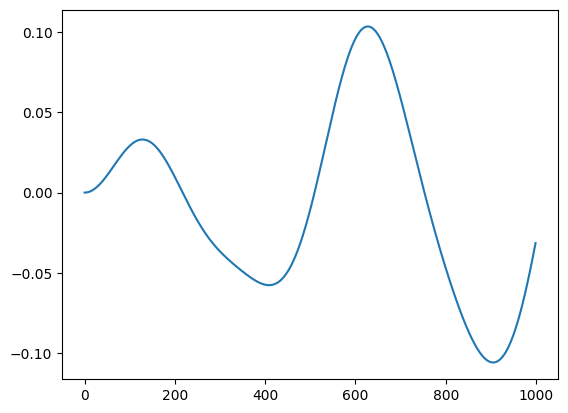

In [29]:
plt.plot(ans.T[0])

In [30]:
# Membuat Persamaan Energi Kinetik
def get_energi(w):
  t = np.linspace(0, 100, 2000)
  ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)
  vx1 = vx1_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
  vx2 = vx2_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
  vy1 = vy1_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
  vy2 = vy2_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
  E = 1/2 * np.mean(vx1**2 + vx2**2 + vy1**2 + vy2**2)
  return E

In [32]:
ws = np.linspace(0.4, 1.3, 100)
Es = np.vectorize(get_energi)(ws)

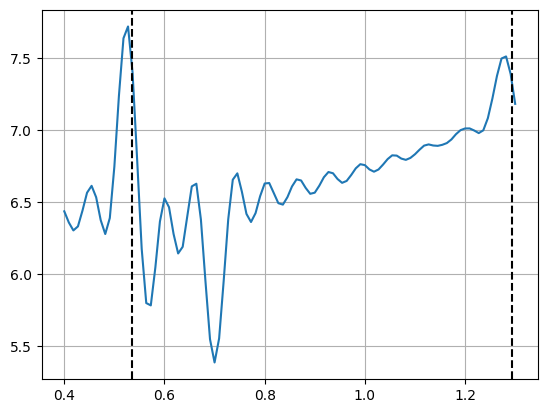

In [34]:
plt.plot(ws, Es)
plt.axvline(1.84775*np.sqrt(g/L1), c='k', ls='--')
plt.axvline(0.76536*np.sqrt(g/L1), c='k', ls='--')
# Tautochrome
# plt.axvline(np.sqrt(np.pi*g**(-1/2)), c='k', ls='--')
plt.grid()

In [35]:
t = np.linspace(0, 200, 20000)
g = 9.81
m = 1
L1 = 20
L2 = 20
w = ws[ws>1][np.argmax(Es[ws>1])]
ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)

In [36]:
def get_x0y0x1y1x2y2(t, the1, the2, L1, L2):
  return (np.cos(w*t),
          0*t,
          np.cos(w*t) + L1*np.sin(the1),
          -L1*np.cos(the1),
          np.cos(w*t) + L1*np.sin(the1) + L2*np.sin(the2),
          -L1*np.cos(the1) - L2*np.cos(the2),
  )

In [37]:
x0, y0, x1, y1, x2, y2 = get_x0y0x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

In [42]:
def animate(i):
  ln1.set_data([x0[::10][i], x1[::10][i], x2[::10][i]], [y0[::10][i], y1[::10][i], y2[::10][i]])
  trail1 = 50     # Panjang jejak benda 1
  trail2 = 50     # Panjang jejak benda 2
  ln2.set_data(x1[::10][i:max(1,i-trail1):-1], y1[::10][i:max(1,i-trail1):-1])  # Jejak dan Garis pada benda 1
  ln3.set_data(x2[::10][i:max(1,i-trail2):-1], y2[::10][i:max(1,i-trail2):-1])  # Jejak dan Garis pada benda 2

<ipython-input-43-b59cca03e092>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  ln2, = ax.plot([], [],'ro--', markersize=8, alpha=0.05, color='cyan')  # Line for Earth
<ipython-input-43-b59cca03e092>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  ln3, = ax.plot([], [],'ro--', markersize=8, alpha=0.05, color='cyan')


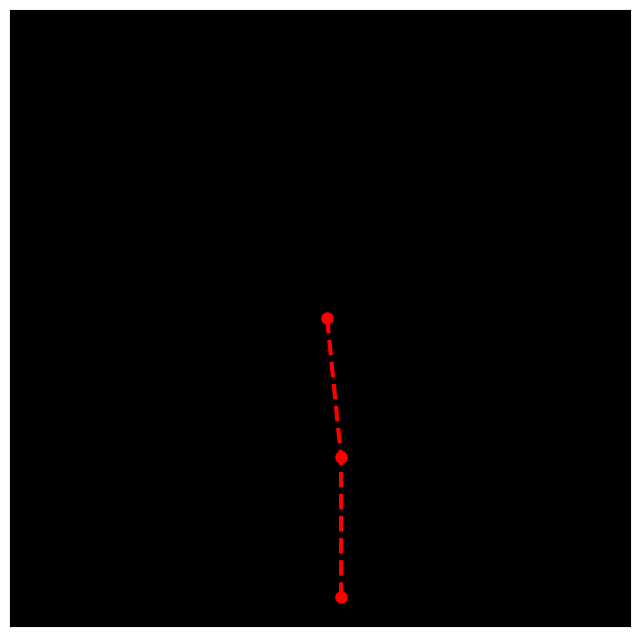

In [43]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # Menyembunyikam garis sumbu x
ax.get_yaxis().set_ticks([])    # Menyembunyikam garis sumbu y
ln1, = plt.plot([], [],'ro--', lw=3, markersize=8)
ln2, = ax.plot([], [],'ro--', markersize=8, alpha=0.05, color='cyan')  # Line for Earth
ln3, = ax.plot([], [],'ro--', markersize=8, alpha=0.05, color='cyan')
ax.set_ylim(-44,44)
ax.set_xlim(-44,44)

# Animasi gerak double pendulum
ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
# ani.save('pen.gif', wirter='pillow',fps=50)
HTML(ani.to_html5_video())